# Bike Sharing Demand

![](https://images.unsplash.com/photo-1554882364-2ce9addc4d09?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1778&q=80)

We will use the Bike Sharing Demand dataset from Kaggle: https://www.kaggle.com/c/bike-sharing-demand.

In [105]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore")

In [106]:
df_bike = pd.read_csv("train.csv")
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [107]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [108]:
df_bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [109]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Feature Engineering

### Creating New Columns From "Datetime" Column

In [110]:
df_bike["datetime"] = pd.to_datetime(df_bike["datetime"])

In [111]:
df_bike["dow"] = df_bike["datetime"].dt.dayofweek

In [112]:
df_bike["month"] = df_bike["datetime"].dt.month

In [113]:
df_bike["week"] = df_bike["datetime"].dt.week

In [114]:
df_bike["hour"] = df_bike["datetime"].dt.hour

In [115]:
df_bike["year"] = df_bike["datetime"].dt.year

In [116]:
df_bike["season"] = df_bike.season.map({1: "Winter", 2 : "Spring", 3 : "Summer", 4 :"Fall" })

In [117]:
df_bike["month_str"] = df_bike.month.map({1: "Jan ", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec" })

In [118]:
df_bike["dow_str"] = df_bike.dow.map({5: "Sat", 6 : "Sun", 0 : "Mon", 1 :"Tue", 2 : "Wed", 3 : "Thu", 4: "Fri" })

In [119]:
df_bike["weather_str"] = df_bike.weather.map({1: "Good", 2 : "Normal", 3 : "Bad", 4 :"Very Bad"})

In [120]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month,week,hour,year,month_str,dow_str,weather_str
0,2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,52,0,2011,Jan,Sat,Good
1,2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,52,1,2011,Jan,Sat,Good
2,2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,52,2,2011,Jan,Sat,Good
3,2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,52,3,2011,Jan,Sat,Good
4,2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,52,4,2011,Jan,Sat,Good


In [121]:
df_bike.dtypes

datetime       datetime64[ns]
season                 object
holiday                 int64
workingday              int64
weather                 int64
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
dow                     int64
month                   int64
week                    int64
hour                    int64
year                    int64
month_str              object
dow_str                object
weather_str            object
dtype: object

### Convert To Category Type

In [122]:
cat_var_list=["season", "holiday", "workingday", "weather", "week", "month", "year", "hour"]
for var in cat_var_list:
    df_bike[var] = df_bike[var].astype("category")

In [123]:
df_bike.dtypes

datetime       datetime64[ns]
season               category
holiday              category
workingday           category
weather              category
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                  int64
registered              int64
count                   int64
dow                     int64
month                category
week                 category
hour                 category
year                 category
month_str              object
dow_str                object
weather_str            object
dtype: object

## Exploratory Data Analysis

### Count Across Month

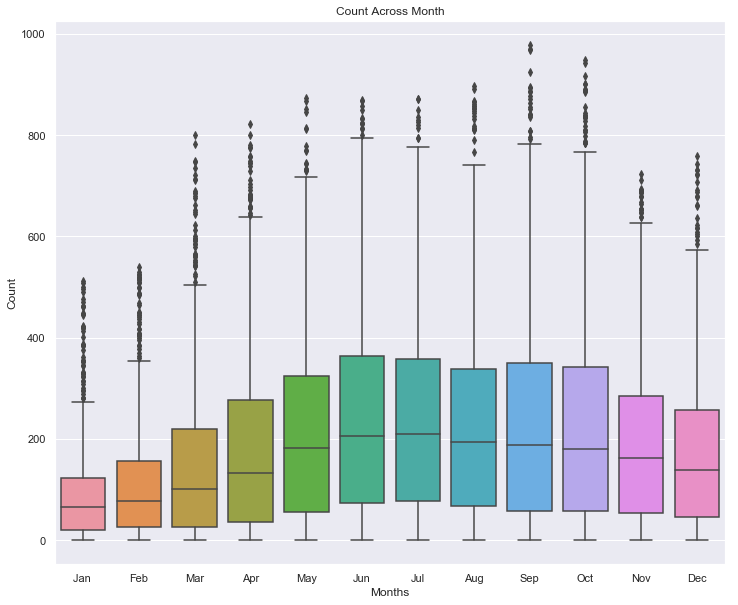

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="month_str",orient="v")
ax.set(xlabel="Months" , ylabel="Count", title="Count Across Month");

### Users Count Across Season

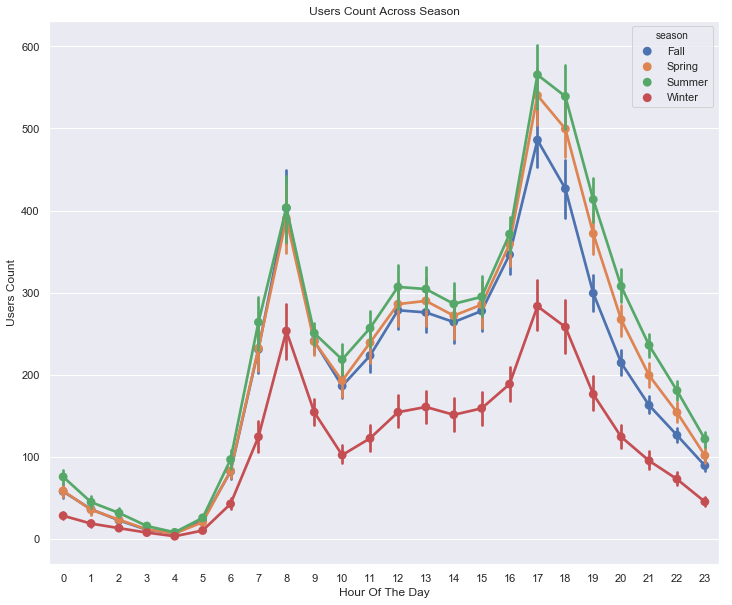

In [125]:
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["count"], hue=df_bike["season"])
axes.set(xlabel="Hour Of The Day", ylabel="Users Count", title="Users Count Across Season");

**People rent more in summer, and less in winter**

### Users Count Across Weekdays

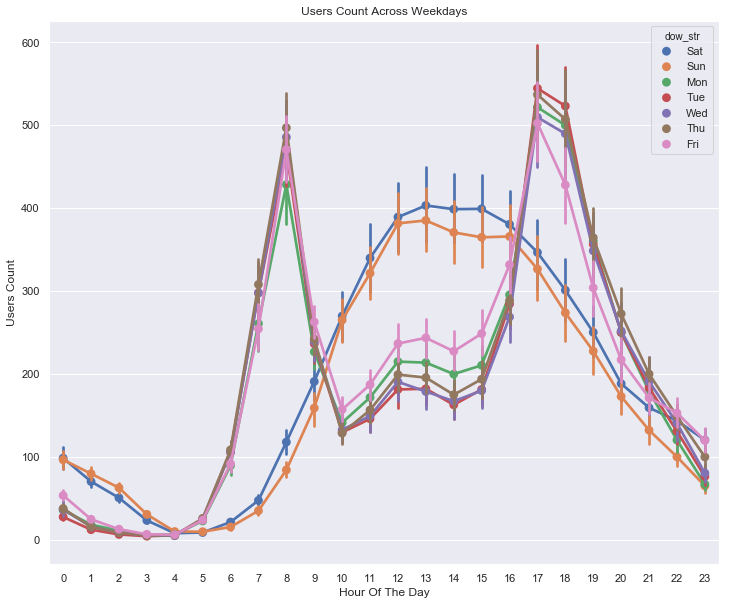

In [126]:
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["count"], hue=df_bike["dow_str"])
axes.set(xlabel="Hour Of The Day", ylabel="Users Count", title="Users Count Across Weekdays");

### Users Count Across Weather

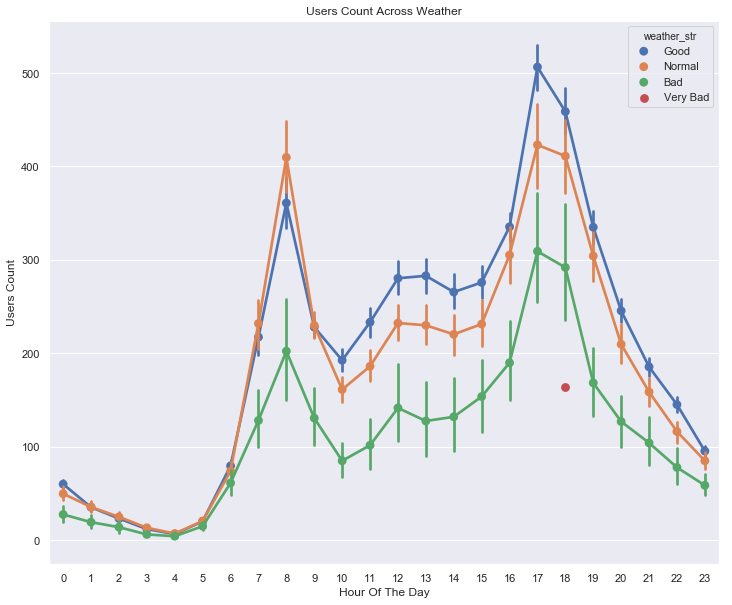

In [127]:
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)
sns.pointplot(x=df_bike["hour"], y=df_bike["count"], hue=df_bike["weather_str"])
axes.set(xlabel="Hour Of The Day", ylabel="Users Count", title="Users Count Across Weather");

In [128]:
df_bike[df_bike["weather"]==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month,week,hour,year,month_str,dow_str,weather_str
5631,2012-01-09 18:00:00,Winter,0,1,4,8.2,11.365,86,6.0032,6,158,164,0,1,2,18,2012,Jan,Mon,Very Bad


### Box Plot on Count Across Season

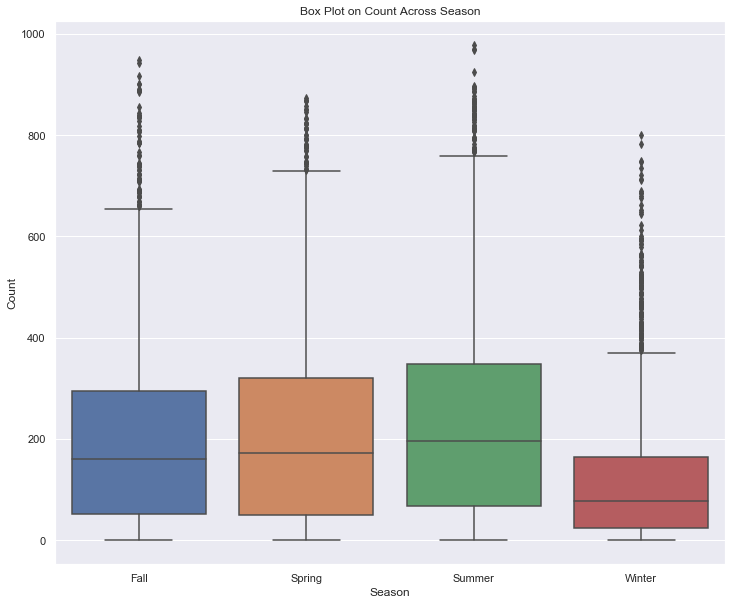

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="season",orient="v")
ax.set(xlabel='Season', ylabel='Count', title="Box Plot on Count Across Season");

### Box Plot on Count Across Hour Of The Day

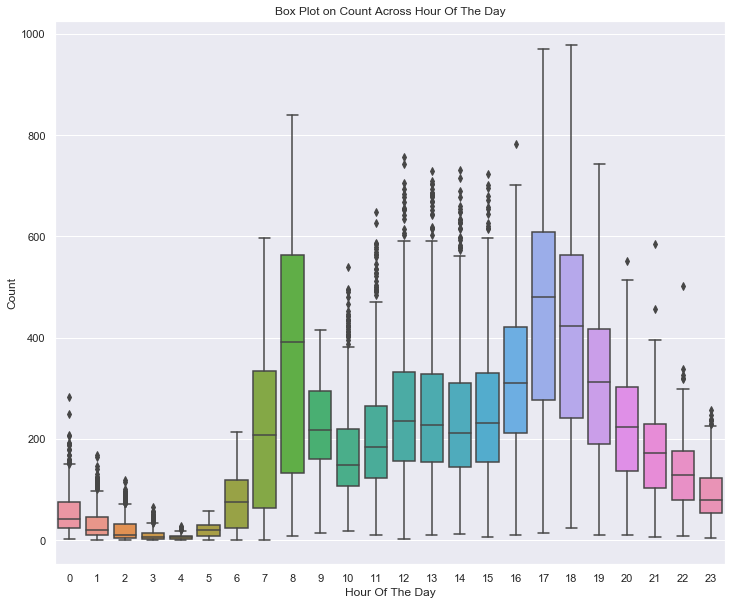

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="hour", orient="v")
ax.set(xlabel='Hour Of The Day', ylabel='Count', title="Box Plot on Count Across Hour Of The Day");

### Box Plot on Count Across Weather

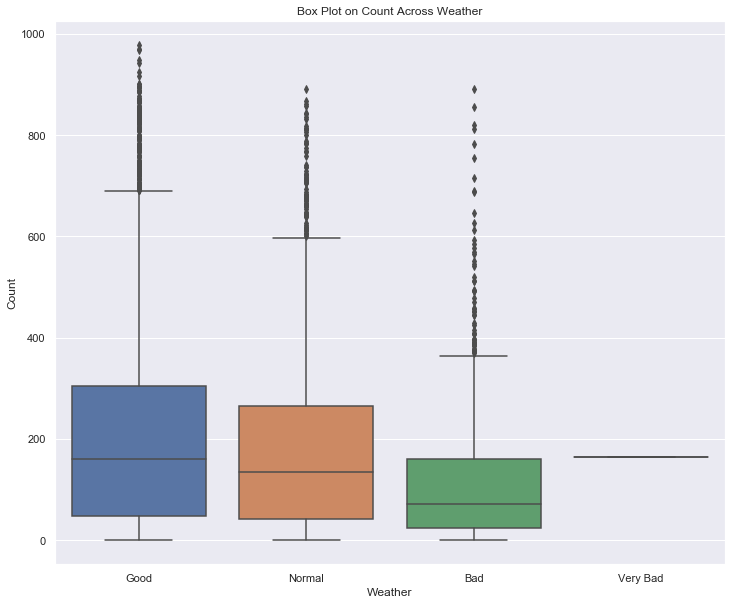

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="weather_str",orient="v")
ax.set(xlabel='Weather', ylabel='Count', title="Box Plot on Count Across Weather");

### Box Plot on Count Across Working Day

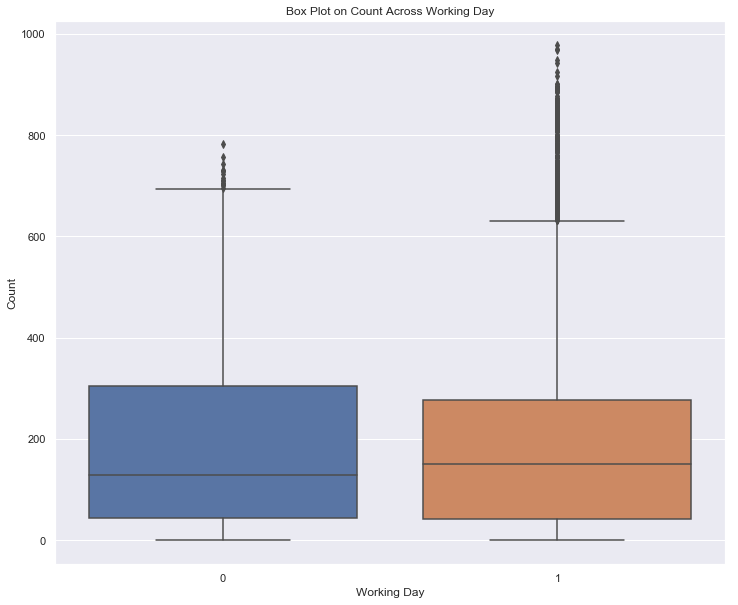

In [132]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_bike, y="count", x="workingday", orient="v");
ax.set(xlabel='Working Day', ylabel='Count', title="Box Plot on Count Across Working Day");

### Registered Users Count Across Workingday and Holiday

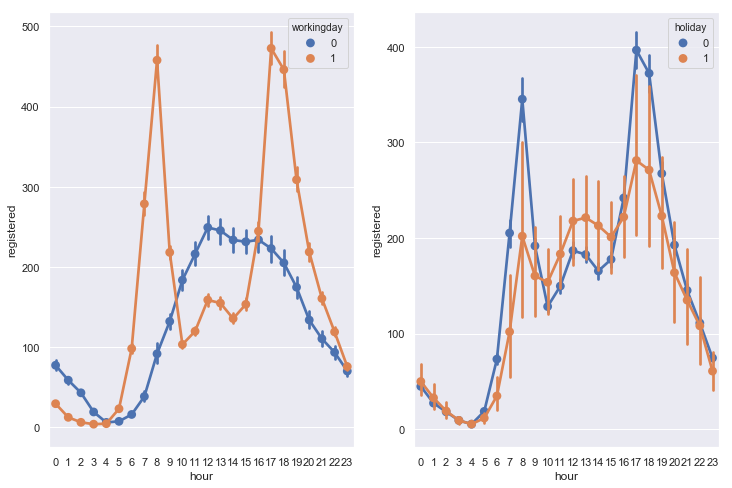

In [133]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 8)
sns.pointplot(x=df_bike["hour"], y=df_bike["registered"], hue=df_bike["workingday"], ax=axes[0])
sns.pointplot(x=df_bike["hour"], y=df_bike["registered"], hue=df_bike["holiday"], ax=axes[1]);

### Casual Users Count Across Workingday and Holiday

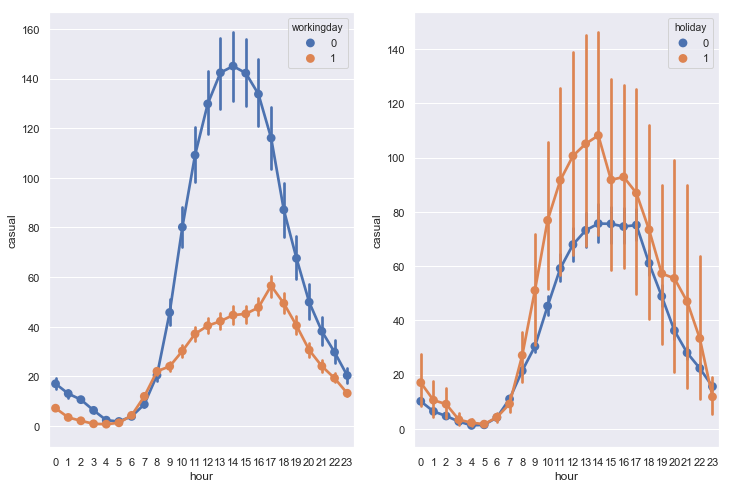

In [134]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 8)
sns.pointplot(x=df_bike["hour"], y=df_bike["casual"], hue=df_bike["workingday"], ax=axes[0])
sns.pointplot(x=df_bike["hour"], y=df_bike["casual"], hue=df_bike["holiday"], ax=axes[1]);

### Correlation Analysis

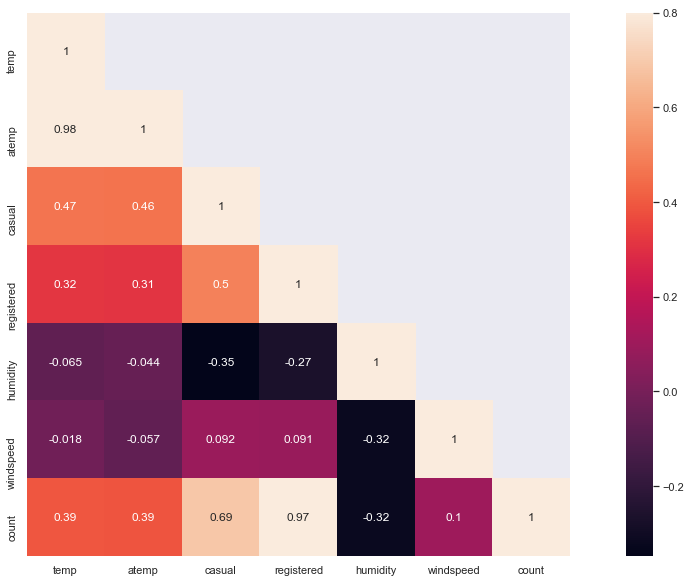

In [135]:
cm = df_bike[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, mask=mask,vmax=.8, square=True,annot=True);

### Distribution Plot for Count

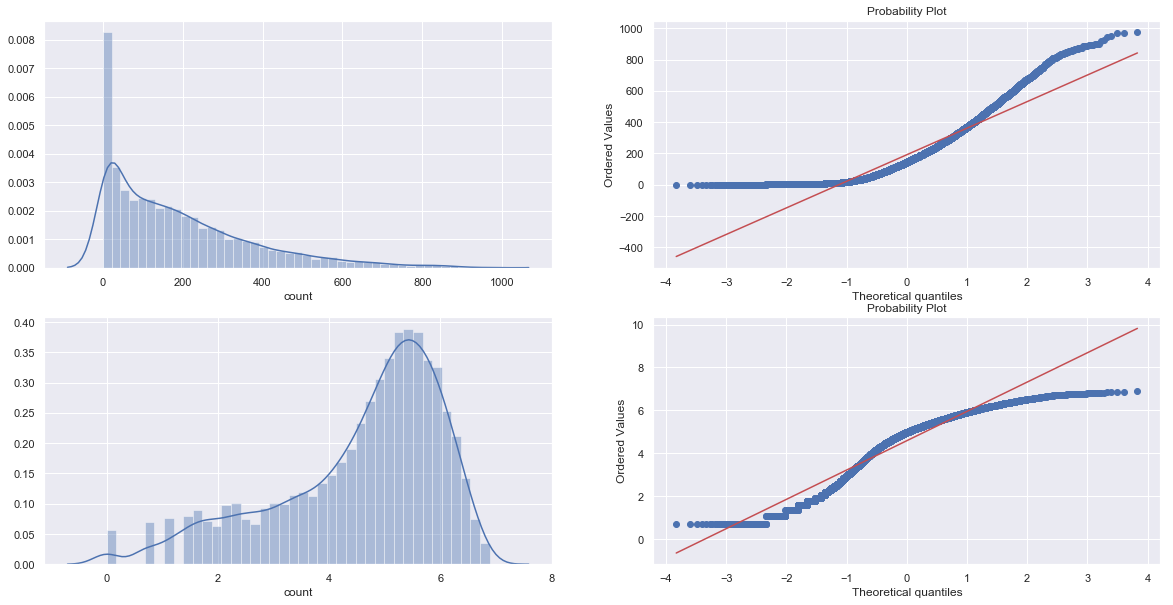

In [136]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 10)
sns.distplot(df_bike["count"],ax=axes[0][0])
stats.probplot(df_bike["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(df_bike["count"]),ax=axes[1][0])
stats.probplot(np.log1p(df_bike["count"]), dist='norm', fit=True, plot=axes[1][1]);

In [137]:
X = df_bike.loc[:, df_bike.columns != "count"]
y = np.log1p(df_bike["count"])

In [138]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,dow,month,week,hour,year,month_str,dow_str,weather_str
0,2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,3,13,5,1,52,0,2011,Jan,Sat,Good
1,2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,8,32,5,1,52,1,2011,Jan,Sat,Good
2,2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,5,27,5,1,52,2,2011,Jan,Sat,Good
3,2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,3,10,5,1,52,3,2011,Jan,Sat,Good
4,2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,0,1,5,1,52,4,2011,Jan,Sat,Good


In [139]:
X = X.drop(columns=["datetime", "atemp", "month_str", "season", "dow_str", "weather_str", "casual", "registered"], axis=1)
X.head()

,holiday,workingday,weather,temp,humidity,windspeed,dow,month,week,hour,year
0,0,0,1,9.84,81,0.0,5,1,52,0,2011
1,0,0,1,9.02,80,0.0,5,1,52,1,2011
2,0,0,1,9.02,80,0.0,5,1,52,2,2011
3,0,0,1,9.84,75,0.0,5,1,52,3,2011
4,0,0,1,9.84,75,0.0,5,1,52,4,2011


In [140]:
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [142]:
X_train.shape, X_test.shape

((8708, 11), (2178, 11))

In [143]:
y_train.shape, y_test.shape

((8708,), (2178,))

### RMSLE Scorer

In [147]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Model Building

## Linear Regression Model

In [148]:
from sklearn.linear_model import LinearRegression

# Initialize linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X = X_train, y = y_train)

# Make predictions
y_pred = lr.predict(X_test)
print("RMSLE Value For Linear Regression:",rmsle(y_test, y_pred))

RMSLE Value For Linear Regression: 0.9536565340973313


## Random Forest

In [149]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RMSLE Value For Linear Regression:",rmsle(y_test, y_pred))

RMSLE Value For Linear Regression: 0.273270527868507


### Feature Importance By Random Forest

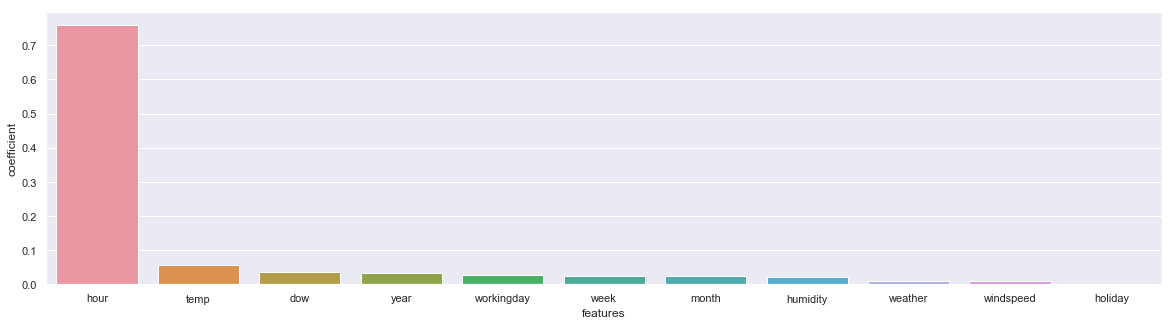

In [155]:
features = pd.DataFrame()
features["features"] = X_train.columns
features["coefficient"] = rf.feature_importances_
features.sort_values(by=["coefficient"], ascending=False, inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=features, x="features", y="coefficient");

## Gradient Boost

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01) 
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("RMSLE Value For Linear Regression:",rmsle(y_test, y_pred))

RMSLE Value For Linear Regression: 0.2544043024817074


## Formatting Final Results

In [188]:
df_test = pd.read_csv("test.csv")
df_sample = pd.read_csv("sampleSubmission.csv")

In [189]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [190]:
df_test["datetime"] = pd.to_datetime(df_test["datetime"])

In [191]:
df_test["dow"] = df_test["datetime"].dt.dayofweek

In [192]:
df_test["month"] = df_test["datetime"].dt.month

In [193]:
df_test["week"] = df_test["datetime"].dt.week

In [194]:
df_test["hour"] = df_test["datetime"].dt.hour

In [195]:
df_test["year"] = df_test["datetime"].dt.year

In [196]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dow,month,week,hour,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,3,1,3,0,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,1,3,1,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,1,3,2,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,3,3,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,3,4,2011


In [197]:
datetimecol = df_test["datetime"]

In [198]:
df_test = df_test.drop(columns=["datetime", "atemp", "season"], axis=1)
df_test.head()

,holiday,workingday,weather,temp,humidity,windspeed,dow,month,week,hour,year
0,0,1,1,10.66,56,26.0027,3,1,3,0,2011
1,0,1,1,10.66,56,0.0000,3,1,3,1,2011
2,0,1,1,10.66,56,0.0000,3,1,3,2,2011
3,0,1,1,10.66,56,11.0014,3,1,3,3,2011
4,0,1,1,10.66,56,11.0014,3,1,3,4,2011


In [199]:
df_sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [200]:
y_pred_final = np.exp(gbm.predict(df_test))

In [203]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in y_pred_final]
    })
submission.to_csv('bike_prediction_output.csv', index=False)

In [205]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.635333
1,2011-01-20 01:00:00,6.144191
2,2011-01-20 02:00:00,4.170958
3,2011-01-20 03:00:00,3.020862
4,2011-01-20 04:00:00,2.386718


*Submit to kaggle, this model scores 0.40*